<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/Analisis_Datos_Abiertos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Datos Abiertos
## TalentoTech
## Bootcamp de Inteligencia Artificial Nivel Innovador
### Integrantes:  
* Andrea Osorio
* Luis Murcia
* Silvana Jaramillo
* Yeison Rodriguez




# **Entendimiento del proyecto:**


* Analizar el rendimiento agrícola en el periodo 2011 en Cota, Cundinamarca, para una base de datos de 1000 registros, con relación a su área de siembra, área total, tipo de cultivo y producción.


# **Comprensión de los datos**

Esta es una copia de los conjuntos de datos de Datos Abiertos Evaluaciones Agropecuarias por consenso DEPARTAMENTO DE BOYACÁ https://www.datos.gov.co/d/u958-pr9h/visualization

In [ ]:
pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
# Leer los datos
# Importar librerìas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# URL del conjunto de datos
# url = "https://www.datos.gov.co/resource/u958-pr9h.csv?$query=SELECT%0A%20%20%60tipo%60%2C%0A%20%20%60municipio%60%2C%0A%20%20%60cultivo%60%2C%0A%20%20%60periodo%60%2C%0A%20%20%60area_sembrada_ha%60%2C%0A%20%20%60area_cosechada_ha%60%2C%0A%20%20%60produccion_t%60%2C%0A%20%20%60rendimiento_t_ha%60%0AORDER%20BY%20%60periodo%60%20ASC%20NULL%20LAST"
url = "https://www.datos.gov.co/resource/u958-pr9h.csv?$query=SELECT%0A%20%20%60tipo%60%2C%0A%20%20%60municipio%60%2C%0A%20%20%60cultivo%60%2C%0A%20%20%60periodo%60%2C%0A%20%20%60area_sembrada_ha%60%2C%0A%20%20%60area_cosechada_ha%60%2C%0A%20%20%60produccion_t%60%2C%0A%20%20%60rendimiento_t_ha%60%0AORDER%20BY%20%60periodo%60%20DESC%20NULL%20LAST"

# Cargar el conjunto de datos en un DataFrame de pandas
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(df.head())


                    tipo  municipio           cultivo periodo  \
0  CULTIVOS TRANSITORIOS    Susacón             Trigo   2022B   
1  CULTIVOS TRANSITORIOS    Chivatá            Arveja   2022B   
2  CULTIVOS TRANSITORIOS  Siachoque  Otras hortalizas   2022B   
3  CULTIVOS TRANSITORIOS     Soracá             Trigo   2022B   
4  CULTIVOS TRANSITORIOS   Corrales  Cebolla De Bulbo   2022B   

   area_sembrada_ha  area_cosechada_ha  produccion_t  rendimiento_t_ha  
0              31.0               30.0         36.00               1.2  
1               7.0                2.0          2.80               1.4  
2               4.0                4.0         80.00              20.0  
3               9.0                2.5          8.75               3.5  
4              19.0               19.0        380.00              20.0  


In [ ]:
# Informaciòn de los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo               1000 non-null   object 
 1   municipio          1000 non-null   object 
 2   cultivo            1000 non-null   object 
 3   periodo            1000 non-null   object 
 4   area_sembrada_ha   1000 non-null   float64
 5   area_cosechada_ha  1000 non-null   float64
 6   produccion_t       1000 non-null   float64
 7   rendimiento_t_ha   1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
df_clear = df.astype({"cultivo": str})


0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
995    <class 'str'>
996    <class 'str'>
997    <class 'str'>
998    <class 'str'>
999    <class 'str'>
Name: cultivo, Length: 1000, dtype: object


In [ ]:
# tamaño dataset
df.shape

(1000, 8)

In [ ]:
# leer columnas
df.columns

Index(['tipo', 'municipio', 'cultivo', 'periodo', 'area_sembrada_ha',
       'area_cosechada_ha', 'produccion_t', 'rendimiento_t_ha'],
      dtype='object')

In [ ]:
print(type(df['cultivo'].value_counts()))
crops_tags = df['cultivo'].value_counts().iloc[0:10]


<class 'pandas.core.series.Series'>


In [ ]:
tags_list = [k for k, v in crops_tags.items()]
print(tags_list)

['Maíz Amarillo Tradicional', 'Arveja', 'Papa', 'Frijol', 'Cebolla De Bulbo', 'Café', 'Tomate Invernadero', 'Yuca', 'Trigo', 'Haba']


In [ ]:
new_df = df[df["cultivo"].isin(tags_list)]

In [ ]:
new_df.shape
new_df = new_df.astype({"area_sembrada_ha": np.float32, "area_cosechada_ha": np.float32,
                    "produccion_t": np.float32, "rendimiento_t_ha": np.float32})

#new_df["area_sembrada_ha"] = new_df[["area_sembrada_ha"]].apply(pd.to_numeric)
#new_df["area_cosechada_ha"] = new_df[["area_cosechada_ha"]].apply(pd.to_numeric)
#new_df["produccion_t"] = new_df[["produccion_t"]].apply(pd.to_numeric)
#new_df["rendimiento_t_ha"] = new_df[["rendimiento_t_ha"]].apply(pd.to_numeric)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo               597 non-null    object 
 1   municipio          597 non-null    object 
 2   cultivo            597 non-null    object 
 3   periodo            597 non-null    object 
 4   area_sembrada_ha   597 non-null    float32
 5   area_cosechada_ha  597 non-null    float32
 6   produccion_t       597 non-null    float32
 7   rendimiento_t_ha   597 non-null    float32
dtypes: float32(4), object(4)
memory usage: 32.6+ KB


In [ ]:
# Leer columnas de variables numericas
new_df.select_dtypes(np.number).columns

Index(['area_sembrada_ha', 'area_cosechada_ha', 'produccion_t',
       'rendimiento_t_ha'],
      dtype='object')

In [ ]:
# Describir datos estadisticos de variables numericas
new_df.describe(include=np.number).round(2)

,area_sembrada_ha,area_cosechada_ha,produccion_t,rendimiento_t_ha
count,597.00,597.00,597.00,597.00
mean,73.82,72.16,1040.59,9.93
std,239.98,209.47,4769.06,18.46
min,0.00,0.00,0.00,0.00
25%,3.00,5.00,10.47,1.03
50%,12.00,17.00,42.06,1.68
75%,50.00,50.00,252.43,14.00
max,3400.00,2550.00,52800.00,120.00


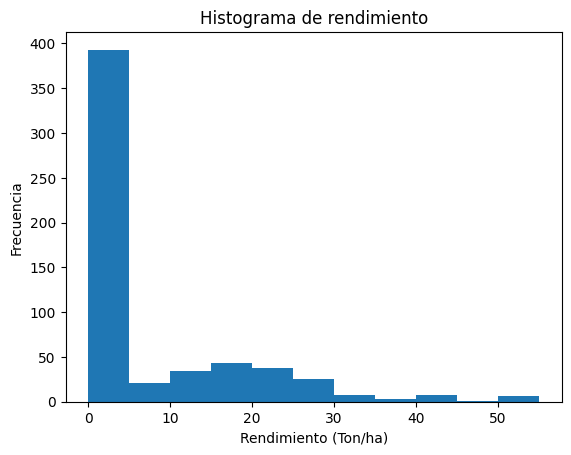

In [ ]:
#Histogramas de las variables numericas

plt.hist(new_df['rendimiento_t_ha'], bins=11, range=(0, 55))
plt.title('Histograma de rendimiento')
plt.xlabel('Rendimiento (Ton/ha)')
plt.ylabel('Frecuencia')
plt.show()

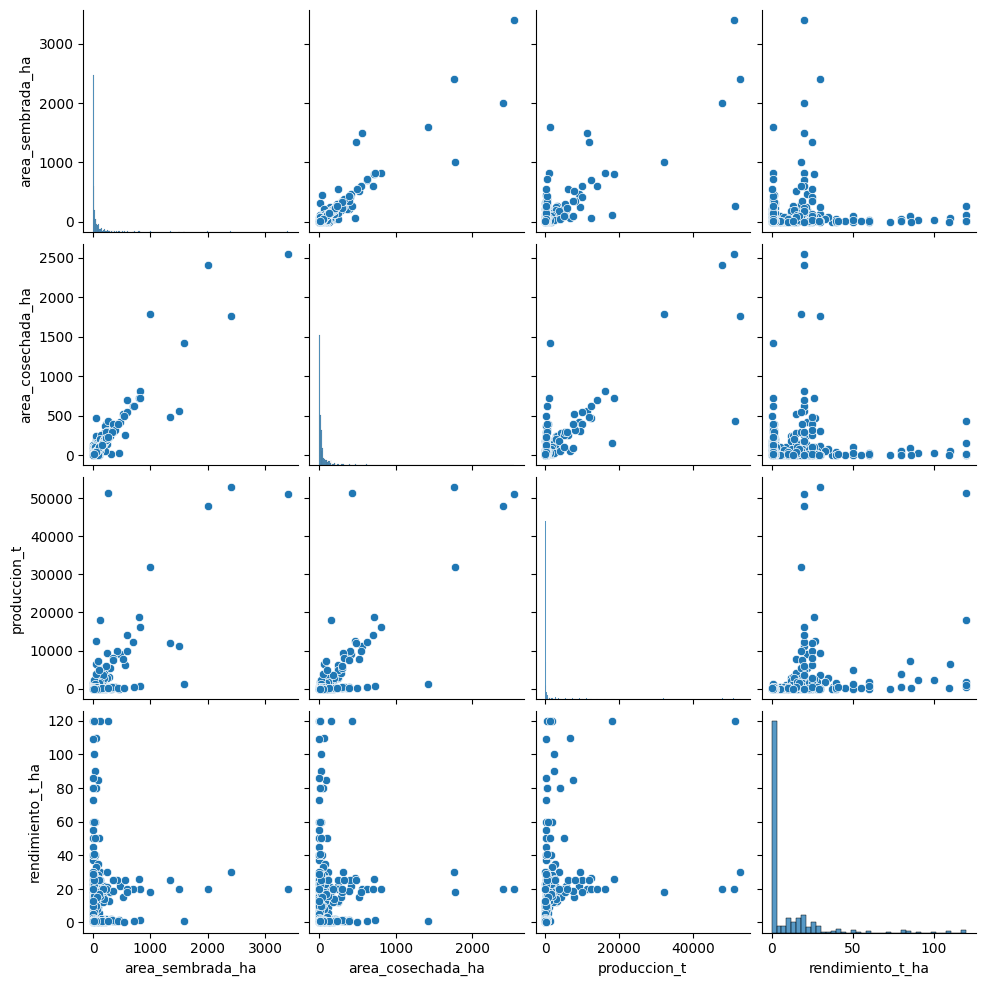

In [ ]:
# Graficar distribución de pares de variables
sns.pairplot(new_df)

# **Preparación de los datos**

In [ ]:
# Revisar númer de valores duplicados
new_df.duplicated().sum()

0

In [ ]:
# Revisar valores faltantes
new_df.isna().sum()

tipo                 0
municipio            0
cultivo              0
periodo              0
area_sembrada_ha     0
area_cosechada_ha    0
produccion_t         0
rendimiento_t_ha     0
dtype: int64

In [ ]:
new_df['rendimiento_t_ha'].value_counts(dropna=False) #REVISAR DATOS FALTANTES

rendimiento_t_ha
1.00     32
1.50     24
20.00    24
1.40     22
2.00     21
         ..
6.40      1
0.82      1
24.00     1
3.27      1
0.41      1
Name: count, Length: 169, dtype: int64

In [ ]:
new_df['rendimiento_t_ha'].value_counts(dropna=True)

rendimiento_t_ha
1.00     32
1.50     24
20.00    24
1.40     22
2.00     21
         ..
6.40      1
0.82      1
24.00     1
3.27      1
0.41      1
Name: count, Length: 169, dtype: int64

In [ ]:
new_df.isnull()

,tipo,municipio,cultivo,periodo,area_sembrada_ha,area_cosechada_ha,produccion_t,rendimiento_t_ha
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
992,False,False,False,False,False,False,False,False
993,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
new_df.isnull().sum()

tipo                 0
municipio            0
cultivo              0
periodo              0
area_sembrada_ha     0
area_cosechada_ha    0
produccion_t         0
rendimiento_t_ha     0
dtype: int64

In [ ]:
new_df.isnull().sum().sum()

0

In [ ]:
(len(new_df)-new_df.count()).sum()

0

In [ ]:
median_age=new_df['rendimiento_t_ha'].median(axis=0)

median_age #calculo de la mediana

1.68

In [ ]:
new_df['rendimiento_t_ha'].fillna(median_age,inplace=True)
new_df['rendimiento_t_ha']

0       1.20
1       1.40
3       3.50
4      20.00
5       0.90
       ...  
992     0.78
993     0.79
997     1.18
998     0.69
999     0.41
Name: rendimiento_t_ha, Length: 597, dtype: float32

In [ ]:
new_df.isnull().sum()

tipo                 0
municipio            0
cultivo              0
periodo              0
area_sembrada_ha     0
area_cosechada_ha    0
produccion_t         0
rendimiento_t_ha     0
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo               597 non-null    object 
 1   municipio          597 non-null    object 
 2   cultivo            597 non-null    object 
 3   periodo            597 non-null    object 
 4   area_sembrada_ha   597 non-null    float32
 5   area_cosechada_ha  597 non-null    float32
 6   produccion_t       597 non-null    float32
 7   rendimiento_t_ha   597 non-null    float32
dtypes: float32(4), object(4)
memory usage: 32.6+ KB


In [ ]:
import pandas as pd

# Calcular la frecuencia de cada categoría en la columna 'tipo'
frecuencia_tipo = new_df['tipo'].value_counts()

# Calcular la frecuencia de cada categoría en la columna 'municipio'
frecuencia_municipio = new_df['municipio'].value_counts()

# Calcular la frecuencia de cada categoría en la columna 'cultivo'
frecuencia_cultivo = new_df['cultivo'].value_counts()

# Calcular la frecuencia de cada categoría en la columna 'periodo'
frecuencia_periodo = new_df['periodo'].value_counts()

# Mostrar los resultados
print("Frecuencia de cada categoría en la columna 'tipo':")
print(frecuencia_tipo)
print("\nFrecuencia de cada categoría en la columna 'municipio':")
print(frecuencia_municipio)
print("\nFrecuencia de cada categoría en la columna 'cultivo':")
print(frecuencia_cultivo)
print("\nFrecuencia de cada categoría en la columna 'periodo':")
print(frecuencia_periodo)


Frecuencia de cada categoría en la columna 'tipo':
tipo
CULTIVOS TRANSITORIOS    554
CULTIVOS PERMANENTES      43
Name: count, dtype: int64

Frecuencia de cada categoría en la columna 'municipio':
municipio
Chita         8
Firavitoba    8
Nobsa         8
Pachavita     7
Soatá         7
             ..
Zetaquira     2
Sáchica       2
Boyacá        2
Pajarito      2
Iza           1
Name: count, Length: 122, dtype: int64

Frecuencia de cada categoría en la columna 'cultivo':
cultivo
Maíz Amarillo Tradicional    106
Arveja                        87
Papa                          87
Frijol                        85
Cebolla De Bulbo              48
Café                          43
Tomate Invernadero            38
Yuca                          38
Trigo                         33
Haba                          32
Name: count, dtype: int64

Frecuencia de cada categoría en la columna 'periodo':
periodo
2022B    554
2022      43
Name: count, dtype: int64


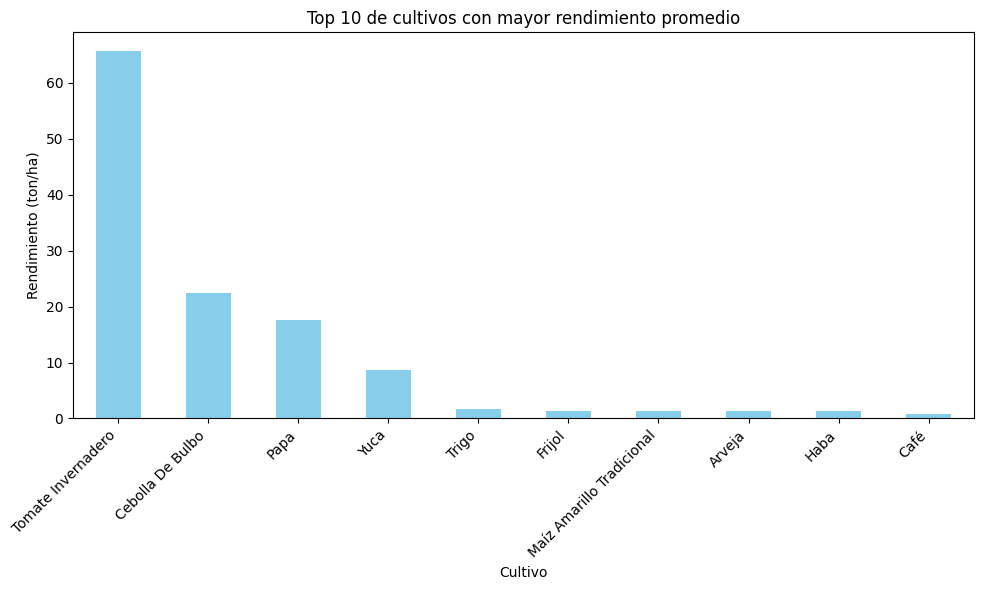

In [ ]:
# Agrupar por cultivo y calcular la productividad media
productividad_promedio = new_df.groupby('cultivo')['rendimiento_t_ha'].mean().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
productividad_promedio.plot(kind='bar', color='skyblue')
plt.title('Top 10 de cultivos con mayor rendimiento promedio')
plt.xlabel('Cultivo')
plt.ylabel('Rendimiento (ton/ha)')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()

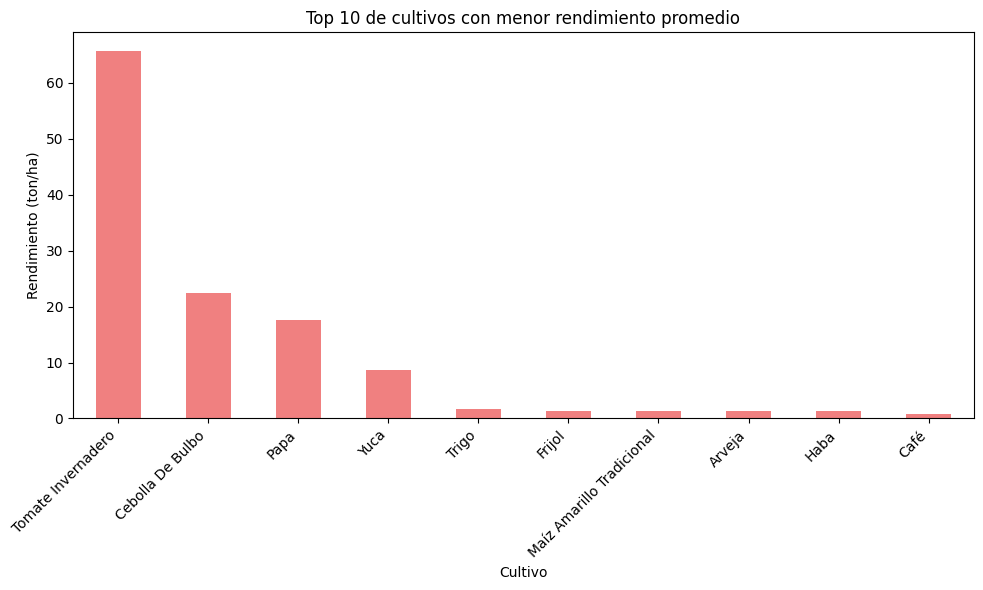

In [ ]:
# Agrupar por cultivo y calcular la productividad media
productividad_promedio = new_df.groupby('cultivo')['rendimiento_t_ha'].mean().sort_values(ascending=False).tail(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
productividad_promedio.plot(kind='bar', color='lightcoral')
plt.title('Top 10 de cultivos con menor rendimiento promedio')
plt.xlabel('Cultivo')
plt.ylabel('Rendimiento (ton/ha)')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_df[["tipo", "municipio", "periodo", "area_sembrada_ha",
                                                       "area_cosechada_ha", "produccion_t", "rendimiento_t_ha"]], new_df['cultivo'], test_size=0.25, random_state=42)

In [ ]:
x_train.shape
x_test.shape

(150, 7)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo               597 non-null    object 
 1   municipio          597 non-null    object 
 2   cultivo            597 non-null    object 
 3   periodo            597 non-null    object 
 4   area_sembrada_ha   597 non-null    float32
 5   area_cosechada_ha  597 non-null    float32
 6   produccion_t       597 non-null    float32
 7   rendimiento_t_ha   597 non-null    float32
dtypes: float32(4), object(4)
memory usage: 32.6+ KB


In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
np.random.seed(42)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[7]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 152 to 973
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tipo               150 non-null    object 
 1   municipio          150 non-null    object 
 2   periodo            150 non-null    object 
 3   area_sembrada_ha   150 non-null    float32
 4   area_cosechada_ha  150 non-null    float32
 5   produccion_t       150 non-null    float32
 6   rendimiento_t_ha   150 non-null    float32
dtypes: float32(4), object(3)
memory usage: 7.0+ KB


In [ ]:
entrenamiento = model.fit(x_train, y_train, epochs=35, validation_data=(x_test, y_test))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
import pandas as pd
import numpy as np
model.evaluate(x_test,y_test)

In [ ]:
print(f"y_train data type: {y_train.dtype}")
print(f"y_test data type: {y_test.dtype}")